# M2R - Quicksort

## Simple plot with R

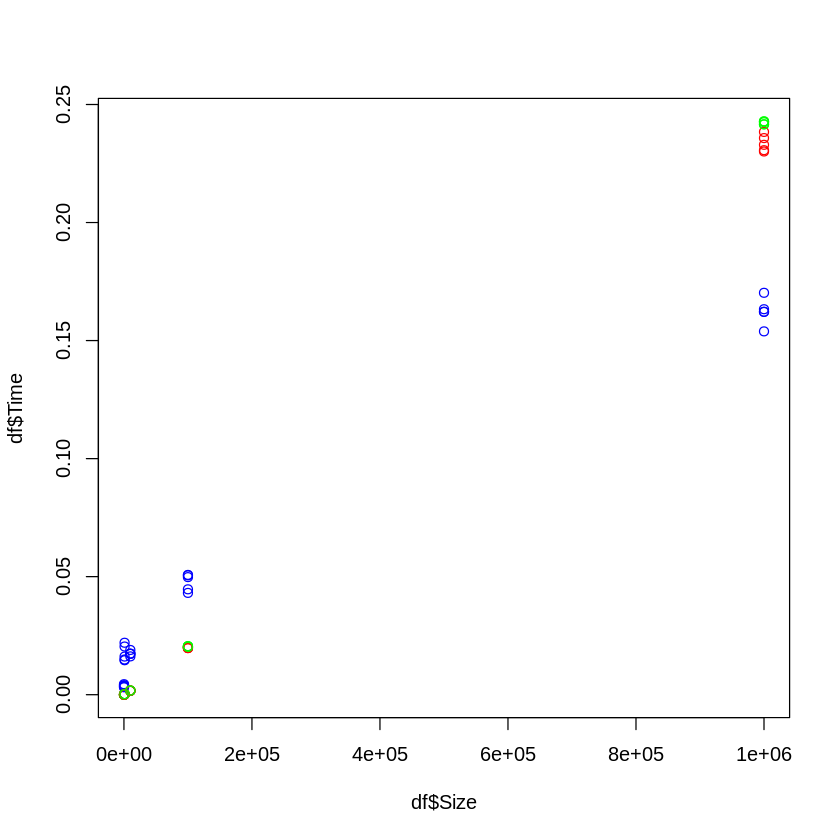

In [1]:
df <- read.csv("measurements_03:47.csv",header=T)
plot(df$Size,df$Time,col=c("red","blue","green"))

### As we can see, the plot isn't very clear. Let's try using ggplot.

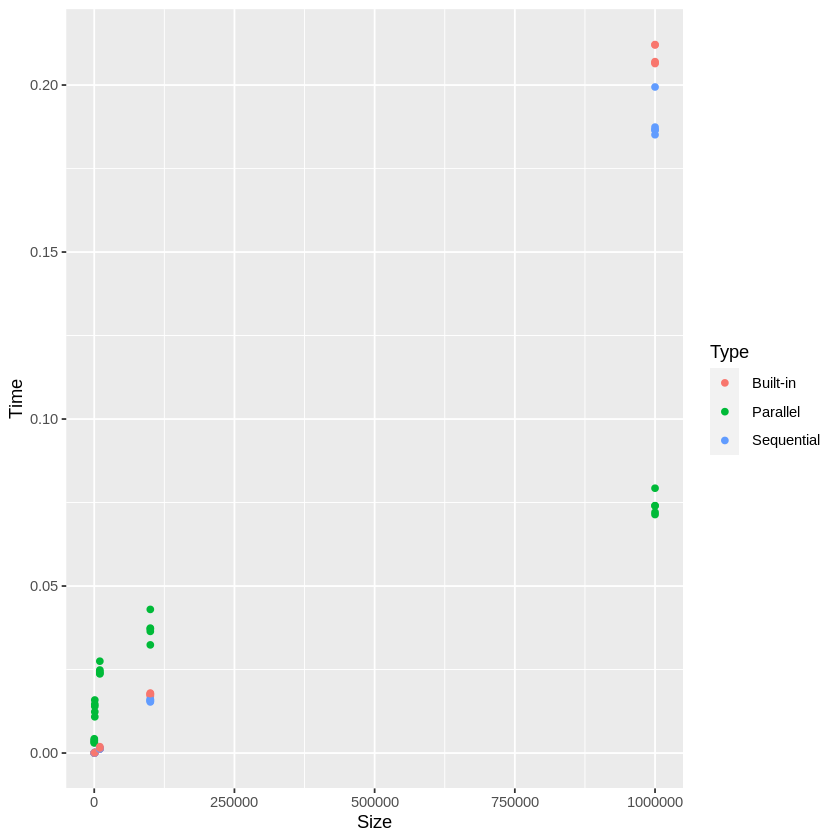

In [2]:
df <- read.csv("measurements_15:29.csv",header=T)
library(ggplot2)
ggplot(df, aes(x = Size, y = Time, color = Type)) + geom_point()

### That's a better visualisation! Nevertheless, those points don't quickly present the information we want to the viewer, since they have to see each color in each column and compare them individually. Let's see a solution:

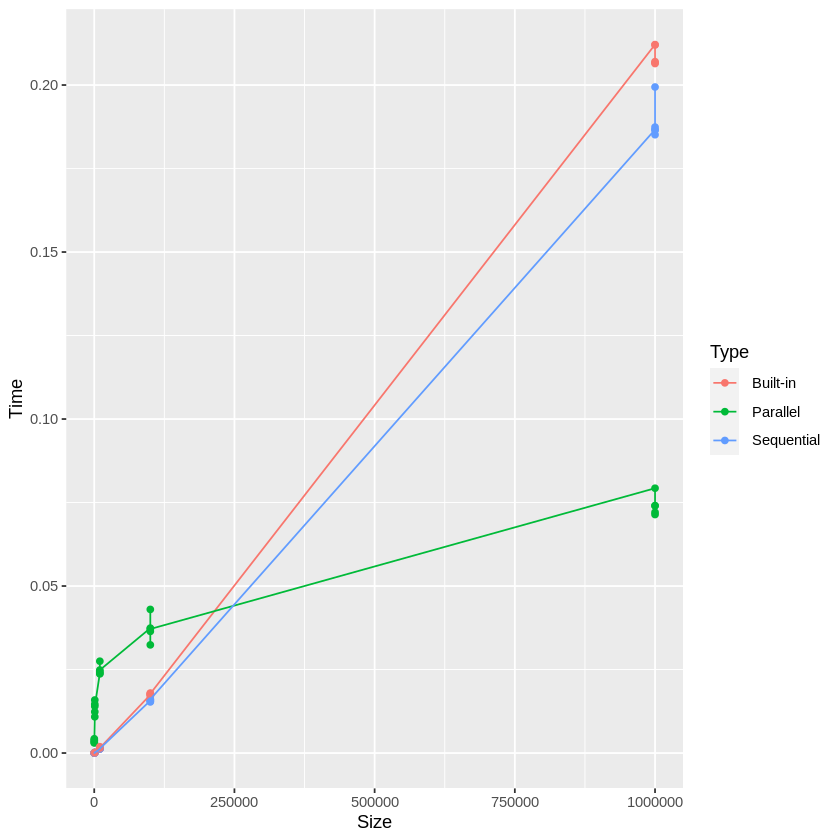

In [3]:
df <- read.csv("measurements_15:29.csv",header=T)
library(ggplot2)
ggplot(df, aes(x = Size, y = Time, color = Type)) + geom_point() + geom_line()

### Way better now! By adding a line, we can clearly see the growth in the execution time.

### However, as we can see, our datapoints go from size 100000 to 1000000. That's a huge gap. Let's add more sizes to better understand the performance.

`summarise()` has grouped output by 'Size'. You can override using the `.groups` argument.



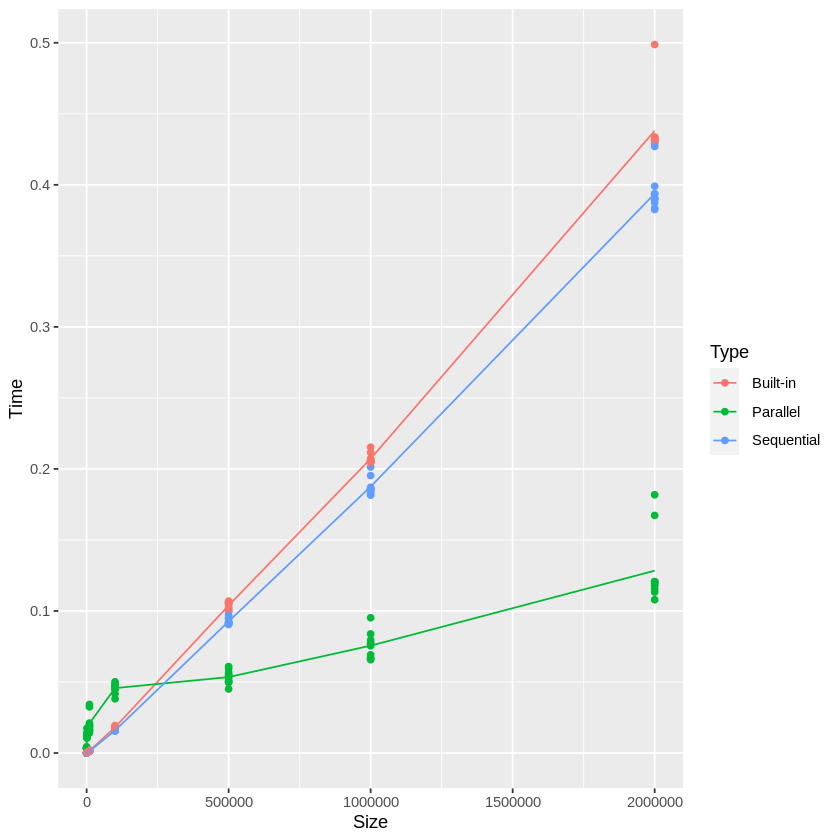

In [8]:
df <- read.csv("measurements_22_12.csv",header=T)
library(ggplot2)
library(dplyr)
df %>% group_by(Size, Type) %>% summarise(Time = mean(Time)) -> df_mean
ggplot(df, aes(x = Size, y = Time, color = Type)) + geom_point(data=df) + geom_line(data=df_mean)



### Lovely! The only thing that makes us cautious is the variance in those datapoints. Let's analyse it:

`summarise()` has grouped output by 'Size'. You can override using the `.groups` argument.



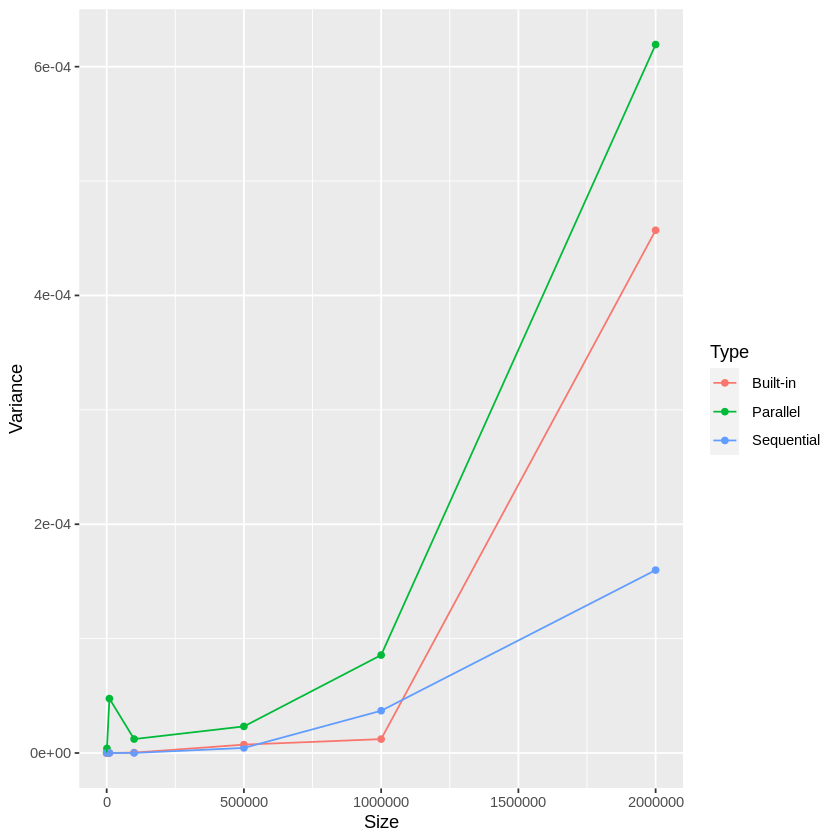

In [34]:
df <- read.csv("measurements_22_12.csv",header=T)
df %>% group_by(Size, Type) %>% summarise(Variance = var(Time)) -> df_var
ggplot(df, aes(x = Size, y = Variance, color = Type)) + geom_point(data=df_var) + geom_line(data=df_var)

### As we can see, the variance grows as the data size grows. This probably happens because the longer the computer works, the higher the chances of other actitivies to happen in the meantime. Therefore, it becomes harder to measure. One alternative would be to have more test cases for larger datasets.